In [1]:
import pandas as pd
from atwater_functions import load_data, merge_data, plot_with_dividers
import matplotlib.pyplot as plt
from datetime import timedelta
import matplotlib.patches as mpatches

In [2]:
energy_file_path = 'raw_data/Energy Select Sector SPDR Fund.csv'
consumer_staples_file_path = 'raw_data/Consumer Staples Select Sector SPDR Fund.csv'
financial_file_path = 'raw_data/Financial Select Sector SPDR Fund.csv'
health_care_file_path = 'raw_data/Health Care Select Sector SPDR Fund.csv'
tech_file_path = 'raw_data/Technology Select Sector SPDR Fund.csv'
political_file_path = 'raw_data/political_control_final.csv'

In [3]:
stock_only = pd.read_csv(energy_file_path)
stock_only

,Unnamed: 0,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
0,2024-12-09,91.78,92.265,90.790,90.87,90.8700,11337183,0.0
1,2024-12-06,95.50,95.660,90.845,91.02,91.0200,60731796,0.0
2,2024-11-29,97.25,97.740,94.780,95.53,95.5300,43557441,0.0
3,2024-11-22,95.48,97.920,94.925,97.27,97.2700,61023116,0.0
4,2024-11-15,93.77,95.690,92.930,94.73,94.7300,54588819,0.0
...,...,...,...,...,...,...,...,...
1305,1999-12-10,27.19,27.310,26.160,26.31,13.7751,440600,0.0
1306,1999-12-03,27.11,27.520,26.920,27.13,14.2045,367800,0.0
1307,1999-11-26,28.48,28.560,27.220,27.25,14.2673,750100,0.0
1308,1999-11-19,27.98,29.190,27.880,28.34,14.8380,407600,0.0


In [4]:
# Load data
stock_file_path = energy_file_path
stock_data, political_data = load_data(stock_file_path, political_file_path)

# Merge datasets
energy_data = merge_data(stock_data, political_data)
energy_data['Sector'] = "Energy"

energy_data = energy_data.rename(
    columns={
        "1. open": "Open",
        "2. high": "High",
        "3. low": "Low",	
        "4. close": "Close",	
        "5. adjusted close": "Adjusted Close",
        "6. volume": "Volume"

    }
)
energy_data = energy_data.drop(columns=['7. dividend amount'])

energy_data


,Date,Open,High,Low,Close,Adjusted Close,Volume,Start Date,End Date,President,House,Senate,Sector
0,2024-12-06,95.50,95.660,90.845,91.02,91.0200,60731796,2023-01-20,2025-01-19,Democratic,Republican,Democratic,Energy
1,2024-11-29,97.25,97.740,94.780,95.53,95.5300,43557441,2023-01-20,2025-01-19,Democratic,Republican,Democratic,Energy
2,2024-11-22,95.48,97.920,94.925,97.27,97.2700,61023116,2023-01-20,2025-01-19,Democratic,Republican,Democratic,Energy
3,2024-11-15,93.77,95.690,92.930,94.73,94.7300,54588819,2023-01-20,2025-01-19,Democratic,Republican,Democratic,Energy
4,2024-11-08,88.63,94.265,88.510,93.75,93.7500,72608319,2023-01-20,2025-01-19,Democratic,Republican,Democratic,Energy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2001-02-23,33.05,33.300,31.700,32.04,17.0854,1021100,2001-01-20,2003-01-19,Republican,Republican,Democratic,Energy
1201,2001-02-16,33.60,33.770,32.400,33.02,17.6080,2004900,2001-01-20,2003-01-19,Republican,Republican,Democratic,Energy
1202,2001-02-09,32.50,34.040,32.500,33.92,18.0880,660600,2001-01-20,2003-01-19,Republican,Republican,Democratic,Energy
1203,2001-02-02,31.90,32.310,31.290,32.25,17.1974,919600,2001-01-20,2003-01-19,Republican,Republican,Democratic,Energy


In [5]:
election_period_prices = (
    energy_data.groupby(['Start Date', 'End Date'])
    .agg(
        start_price = ('Close', 'last'),
        start_ticker = ('Date', 'last'),
        end_price = ('Close', 'first'),
        end_ticker = ('Date', 'first'),
        President = ('President', 'first'),
        House = ('House', 'first'),
        Senate = ('Senate', 'first'),
        Sector = ('Sector', 'first'),
    )
    .reset_index()
)

# Calculate percent change froim earliest to latest close price
election_period_prices['Percent Change'] = (
    (election_period_prices['end_price'] - election_period_prices['start_price'])
    / election_period_prices['start_price']
) * 100

election_period_prices = election_period_prices.rename(
    columns={
        'start_price': 'Start Price',
        'end_price': 'End Price',
        'Start Date': 'Start of Term',
        'End Date': 'End of Term'
    }
)

election_period_prices

,Start of Term,End of Term,Start Price,start_ticker,End Price,end_ticker,President,House,Senate,Sector,Percent Change
0,2001-01-20,2003-01-19,31.78,2001-01-26,22.22,2003-01-17,Republican,Republican,Democratic,Energy,-30.081812
1,2003-01-20,2005-01-19,21.32,2003-01-24,36.46,2005-01-14,Republican,Republican,Republican,Energy,71.013133
2,2005-01-20,2007-01-19,36.40,2005-01-21,56.58,2007-01-19,Republican,Republican,Republican,Energy,55.439560
3,2007-01-20,2009-01-19,56.85,2007-01-26,46.54,2009-01-16,Republican,Democratic,Democratic,Energy,-18.135444
4,2009-01-20,2011-01-19,47.06,2009-01-23,70.65,2011-01-14,Democratic,Democratic,Democratic,Energy,50.127497
5,2011-01-20,2013-01-19,70.10,2011-01-21,75.49,2013-01-18,Democratic,Republican,Democratic,Energy,7.689016
6,2013-01-20,2015-01-19,76.89,2013-01-25,75.23,2015-01-16,Democratic,Republican,Democratic,Energy,-2.158928
7,2015-01-20,2017-01-19,76.66,2015-01-23,74.38,2017-01-13,Democratic,Republican,Republican,Energy,-2.974172
8,2017-01-20,2019-01-19,74.54,2017-01-20,63.84,2019-01-18,Republican,Republican,Republican,Energy,-14.354709
9,2019-01-20,2021-01-19,62.93,2019-01-25,42.75,2021-01-15,Republican,Democratic,Republican,Energy,-32.067376


C:\Users\WillA\AppData\Local\Temp\ipykernel_11560\2716691017.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['End of Term'] = pd.to_datetime(plot_data['End of Term'])


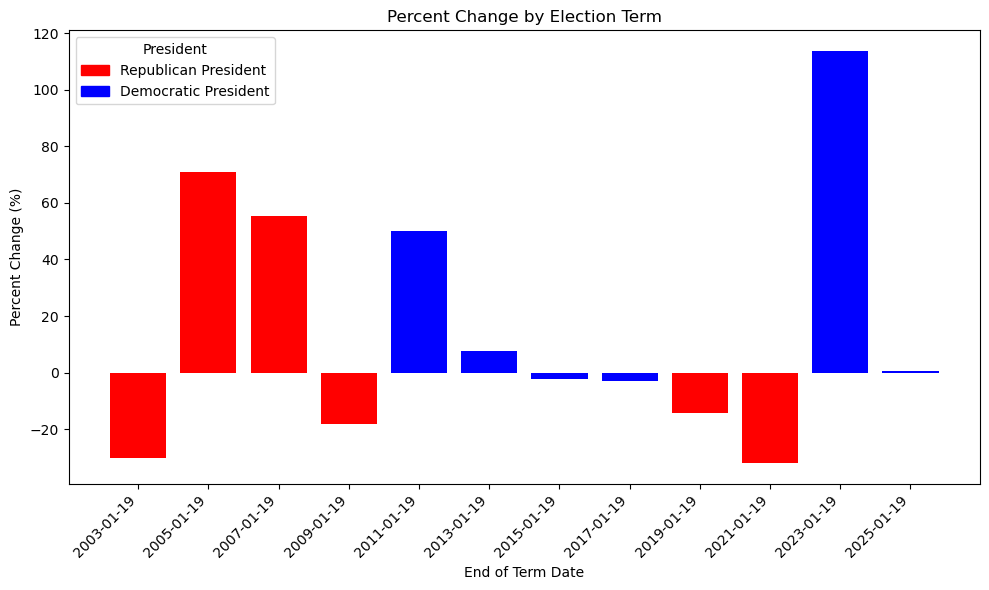

In [6]:
# Plot total percent change over elected term

# Extract relevant columns for the bar plot
plot_data = election_period_prices[['End of Term', 'Percent Change']]

# Convert 'End of Term' to datetime for better sorting and plotting
plot_data['End of Term'] = pd.to_datetime(plot_data['End of Term'])

# Sort by 'End of Term' to ensure chronological order
plot_data = plot_data.sort_values('End of Term')

# Assign colors based on the 'President' column
colors = election_period_prices['President'].apply(lambda x: 'red' if x == 'Republican' else 'blue')


# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(plot_data['End of Term'].dt.strftime('%Y-%m-%d'), 
        plot_data['Percent Change'], 
        color=colors)

# Add legend
red_patch = mpatches.Patch(color='red', label='Republican President')
blue_patch = mpatches.Patch(color='blue', label='Democratic President')
plt.legend(handles=[red_patch, blue_patch], title='President', loc='upper left')

# Customize plot
plt.xticks(rotation=45, ha='right')
plt.title('Percent Change by Election Term')
plt.xlabel('End of Term Date')
plt.ylabel('Percent Change (%)')
plt.tight_layout()
plt.show()

In [7]:
# Generate Lame Duck data

# Convert the 'End Date' column to datetime if not already done
energy_data['End Date'] = pd.to_datetime(energy_data['End Date'])
energy_data['Date'] = pd.to_datetime(energy_data['Date'])

# Generate the lame_duck_energy DataFrame based on the new logic
lame_duck_energy = pd.concat([
    energy_data[
        (energy_data['Date'] >= end_date - timedelta(days=70)) &
        (energy_data['Date'] <= end_date)
    ]
    for end_date in energy_data['End Date'].unique()
])

# Remove duplicates if any were introduced
lame_duck_energy = lame_duck_energy.drop_duplicates()


lame_duck_energy


,Date,Open,High,Low,Close,Adjusted Close,Volume,Start Date,End Date,President,House,Senate,Sector
0,2024-12-06,95.50,95.66,90.845,91.02,91.0200,60731796,2023-01-20,2025-01-19,Democratic,Republican,Democratic,Energy
1,2024-11-29,97.25,97.74,94.780,95.53,95.5300,43557441,2023-01-20,2025-01-19,Democratic,Republican,Democratic,Energy
2,2024-11-22,95.48,97.92,94.925,97.27,97.2700,61023116,2023-01-20,2025-01-19,Democratic,Republican,Democratic,Energy
3,2024-11-15,93.77,95.69,92.930,94.73,94.7300,54588819,2023-01-20,2025-01-19,Democratic,Republican,Democratic,Energy
97,2023-01-13,88.88,90.40,86.490,89.95,84.7225,89514797,2021-01-20,2023-01-19,Democratic,Democratic,Democratic,Energy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,2002-12-13,22.80,23.15,22.400,22.87,12.5946,1413200,2001-01-20,2003-01-19,Republican,Republican,Democratic,Energy
1110,2002-12-06,22.53,22.97,22.280,22.90,12.6111,1956100,2001-01-20,2003-01-19,Republican,Republican,Democratic,Energy
1111,2002-11-29,21.93,22.48,21.740,22.44,12.3578,411400,2001-01-20,2003-01-19,Republican,Republican,Democratic,Energy
1112,2002-11-22,21.99,22.56,21.710,22.02,12.1265,766900,2001-01-20,2003-01-19,Republican,Republican,Democratic,Energy


In [8]:
# Group by Start Date and End Date, calculate earliest and latest closing price

election_period_prices = (
    lame_duck_energy.groupby(['Start Date', 'End Date'])
    .agg(
        start_price = ('Close', 'last'),
        start_ticker = ('Date', 'last'),
        end_price = ('Close', 'first'),
        end_ticker = ('Date', 'first'),
        President = ('President', 'first'),
        House = ('House', 'first'),
        Senate = ('Senate', 'first'),
        Sector = ('Sector', 'first'),
    )
    .reset_index()
)

# Calculate percent change froim earliest to latest close price
election_period_prices['Percent Change'] = (
    (election_period_prices['end_price'] - election_period_prices['start_price'])
    / election_period_prices['start_price']
) * 100

election_period_prices = election_period_prices.rename(
    columns={
        'start_price': 'Start Price',
        'end_price': 'End Price',
        'Start Date': 'Start of Term',
        'End Date': 'End of Term'
    }
)

election_period_prices

,Start of Term,End of Term,Start Price,start_ticker,End Price,end_ticker,President,House,Senate,Sector,Percent Change
0,2001-01-20,2003-01-19,21.88,2002-11-15,22.22,2003-01-17,Republican,Republican,Democratic,Energy,1.553931
1,2003-01-20,2005-01-19,35.90,2004-11-12,36.46,2005-01-14,Republican,Republican,Republican,Energy,1.559889
2,2005-01-20,2007-01-19,57.45,2006-11-10,56.58,2007-01-19,Republican,Republican,Republican,Energy,-1.514360
3,2007-01-20,2009-01-19,47.77,2008-11-14,46.54,2009-01-16,Republican,Democratic,Democratic,Energy,-2.574838
4,2009-01-20,2011-01-19,62.94,2010-11-12,70.65,2011-01-14,Democratic,Democratic,Democratic,Energy,12.249762
5,2011-01-20,2013-01-19,68.92,2012-11-16,75.49,2013-01-18,Democratic,Republican,Democratic,Energy,9.532792
6,2013-01-20,2015-01-19,86.21,2014-11-14,75.23,2015-01-16,Democratic,Republican,Democratic,Energy,-12.736341
7,2015-01-20,2017-01-19,69.46,2016-11-11,74.38,2017-01-13,Democratic,Republican,Republican,Energy,7.083213
8,2017-01-20,2019-01-19,67.18,2018-11-16,63.84,2019-01-18,Republican,Republican,Republican,Energy,-4.971718
9,2019-01-20,2021-01-19,33.88,2020-11-13,42.75,2021-01-15,Republican,Democratic,Republican,Energy,26.180638


C:\Users\WillA\AppData\Local\Temp\ipykernel_11560\3872226778.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['End of Term'] = pd.to_datetime(plot_data['End of Term'])


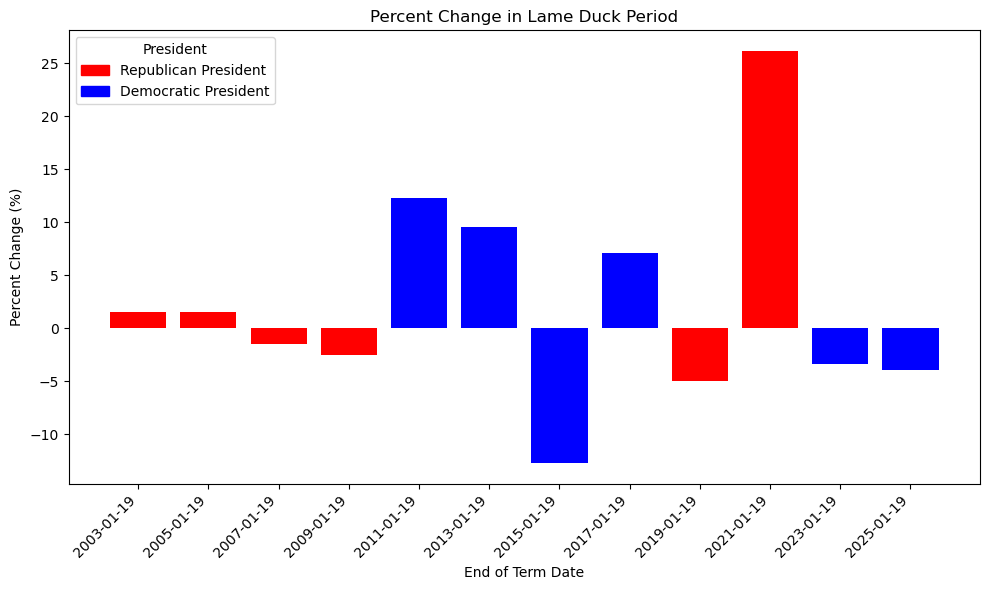

In [9]:
# Plot total percent change from shortly after election day to new president/congress

# Extract relevant columns for the bar plot
plot_data = election_period_prices[['End of Term', 'Percent Change']]

# Convert 'End of Term' to datetime for better sorting and plotting
plot_data['End of Term'] = pd.to_datetime(plot_data['End of Term'])

# Sort by 'End of Term' to ensure chronological order
plot_data = plot_data.sort_values('End of Term')

# Assign colors based on the 'President' column
colors = election_period_prices['President'].apply(lambda x: 'red' if x == 'Republican' else 'blue')


# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(plot_data['End of Term'].dt.strftime('%Y-%m-%d'), 
        plot_data['Percent Change'], 
        color=colors)

# Add legend
red_patch = mpatches.Patch(color='red', label='Republican President')
blue_patch = mpatches.Patch(color='blue', label='Democratic President')
plt.legend(handles=[red_patch, blue_patch], title='President', loc='upper left')

# Customize
plt.xticks(rotation=45, ha='right')
plt.title('Percent Change in Lame Duck Period')
plt.xlabel('End of Term Date')
plt.ylabel('Percent Change (%)')
plt.tight_layout()
plt.show()